This script is used for   
- visualize the distribution of features


**How to launch this Jupyter notebook**:   
```bash
execcasper -A your_project -l gpu_type=v100 -l walltime=06:00:00 -l select=1:ncpus=18:mpiprocs=36:ngpus=1:mem=300GB
bash aws_urban_env.sh
```

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import xarray as xr
import gc
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

start_year = "2006"
end_year = "2015"
p = '/home/zhonghua/UrbFLAM/'
urban_surf_path = p+ "urban_params/urban_surface.parquet.gzip"
parquet_save_path = p+ "urban_params/urban_LE_random_split/"

In [2]:
fd = {
    "label":"TREFMXAV_U",
    "CAM": ['FLNS','FSNS','PRECT','PRSN','QBOT','TREFHT','UBOT','VBOT'],
    "surf":['CANYON_HWR','EM_IMPROAD','EM_PERROAD','EM_ROOF','EM_WALL', 
            'HT_ROOF','THICK_ROOF','THICK_WALL','T_BUILDING_MAX','T_BUILDING_MIN',
            'WTLUNIT_ROOF','WTROAD_PERV','NLEV_IMPROAD','PCT_URBAN',
            'ALB_IMPROAD','ALB_PERROAD','ALB_ROOF','ALB_WALL',
            'TK_ROOF','TK_WALL','CV_ROOF','CV_WALL',
            'TK_IMPROAD_0','CV_IMPROAD_0','TK_IMPROAD_1','CV_IMPROAD_1'],
    "loc":["lat","lon"]
}

def get_merge_member(start_year, end_year, parquet_save_path):
    df_tmp_ls = []
    for member_id in tqdm(range(3, 34)):
        member = (str(member_id).zfill(3))
        df_tmp_ls.append(pd.read_parquet(parquet_save_path + "train/" + member + "_"\
                            + start_year + "_" + end_year + ".parquet.gzip", engine="fastparquet"))
    return pd.concat(df_tmp_ls)



**sampling data distribution**

In [3]:
# load data
def get_train(start_year, end_year, parquet_save_path):
    print("start_year: ", start_year, "end_year: ", end_year)
    urban_LE = get_merge_member(start_year, end_year, parquet_save_path)
    urban_surf = pd.read_parquet(urban_surf_path, engine="fastparquet").reset_index()

    # merge data
    df = pd.merge(urban_LE, urban_surf, on = ["lat","lon"], how = "inner")
    # check if we merge the data successfully
    assert urban_LE.shape[0] == df.shape[0]

    del urban_LE, urban_surf
    gc.collect()

    sample_num = 100000
    df_s = df.sample(sample_num)
    display(df_s.describe().transpose())
    return df_s

for start_year, end_year in zip(["2006","2061"], ["2015","2070"]):
    if start_year == "2006":
        df_2006 = get_train(start_year, end_year, parquet_save_path)
    else:
        df_2061 = get_train(start_year, end_year, parquet_save_path)

start_year:  2006 end_year:  2015


100%|██████████| 31/31 [00:05<00:00,  5.70it/s]


,count,mean,std,min,25%,50%,75%,max
lat,100000.0,2.379739e+01,2.562797e+01,-5.418848e+01,8.952880e+00,2.968586e+01,4.287958e+01,7.020943e+01
lon,100000.0,1.312167e+02,1.119474e+02,0.000000e+00,3.625000e+01,1.000000e+02,2.600000e+02,3.587500e+02
TREFMXAV_U,100000.0,2.949633e+02,1.086108e+01,2.316378e+02,2.890811e+02,2.978754e+02,3.022579e+02,3.241378e+02
FLNS,100000.0,6.046651e+01,3.450269e+01,-2.042873e+01,3.277022e+01,5.537436e+01,8.595792e+01,1.864806e+02
FSNS,100000.0,1.552279e+02,8.012074e+01,0.000000e+00,9.210221e+01,1.594868e+02,2.157408e+02,3.795593e+02
PRECT,100000.0,3.409226e-08,7.208928e-08,-1.057857e-21,1.560612e-10,5.256445e-09,3.826378e-08,2.184542e-06
PRSN,100000.0,1.522664e-09,1.099335e-08,-2.136798e-20,0.000000e+00,0.000000e+00,6.941726e-17,5.477622e-07
QBOT,100000.0,9.165319e-03,5.374708e-03,4.267306e-05,4.448658e-03,8.286095e-03,1.410870e-02,2.533019e-02
TREFHT,100000.0,2.897966e+02,1.092198e+01,2.235458e+02,2.839931e+02,2.925892e+02,2.978417e+02,3.179531e+02
UBOT,100000.0,-9.631339e-03,2.855191e+00,-1.752362e+01,-1.999906e+00,-9.939000e-02,1.948468e+00,2.037500e+01


start_year:  2061 end_year:  2070


100%|██████████| 31/31 [00:05<00:00,  5.88it/s]


,count,mean,std,min,25%,50%,75%,max
lat,100000.0,2.392311e+01,2.561366e+01,-5.418848e+01,8.952880e+00,2.968586e+01,4.287958e+01,7.020943e+01
lon,100000.0,1.314057e+02,1.117935e+02,0.000000e+00,3.625000e+01,1.000000e+02,2.600000e+02,3.587500e+02
TREFMXAV_U,100000.0,2.978924e+02,1.072663e+01,2.344479e+02,2.919394e+02,3.006443e+02,3.049217e+02,3.304731e+02
FLNS,100000.0,5.902221e+01,3.342659e+01,-1.796882e+01,3.184414e+01,5.413968e+01,8.377764e+01,1.913217e+02
FSNS,100000.0,1.596966e+02,7.922076e+01,0.000000e+00,9.855901e+01,1.641715e+02,2.199820e+02,3.714723e+02
PRECT,100000.0,3.596320e-08,8.084317e-08,-1.729573e-21,1.320570e-10,5.221018e-09,3.869995e-08,2.704765e-06
PRSN,100000.0,9.851218e-10,8.609250e-09,-1.127972e-20,0.000000e+00,0.000000e+00,4.177560e-18,5.190755e-07
QBOT,100000.0,1.052581e-02,6.000350e-03,6.950062e-05,5.218972e-03,9.585914e-03,1.608492e-02,2.904016e-02
TREFHT,100000.0,2.926481e+02,1.060703e+01,2.303880e+02,2.866366e+02,2.954584e+02,3.003611e+02,3.217451e+02
UBOT,100000.0,-1.217491e-02,2.869662e+00,-1.553768e+01,-2.042378e+00,-9.061011e-02,1.969625e+00,2.238386e+01


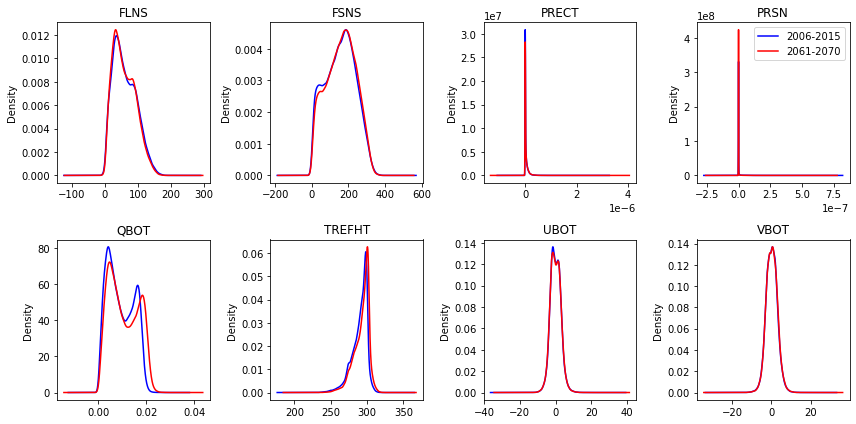

CPU times: user 28.8 s, sys: 41.6 s, total: 1min 10s
Wall time: 19.5 s


In [12]:
%%time
idx = 1
fig = plt.figure(figsize=(12,6))
for f in fd["CAM"]:
    ax = fig.add_subplot(2,4,idx)
    df_2006[f].plot.kde(ax=ax, label="2006-2015", color="blue")
    df_2061[f].plot.kde(ax=ax, label="2061-2070", color="red")
    ax.set_title(f)
    idx+=1 
    if idx == 5:
        ax.legend()
plt.tight_layout()
plt.savefig("CAM_distribution.pdf", dpi=188)
plt.show()

**urban surface - original**

,count,mean,std,min,25%,50%,75%,max
CANYON_HWR,4439.0,6.972120e-01,2.475820e-01,0.320000,4.933287e-01,6.800000e-01,7.594710e-01,2.083438e+00
EM_IMPROAD,4439.0,9.190708e-01,1.630689e-02,0.880000,9.100000e-01,9.100000e-01,9.103509e-01,9.500000e-01
EM_PERROAD,4439.0,9.500000e-01,1.113844e-16,0.950000,9.500000e-01,9.500000e-01,9.500000e-01,9.500000e-01
EM_ROOF,4439.0,7.312764e-01,1.805713e-01,0.298000,6.303252e-01,7.460000e-01,9.040000e-01,9.200000e-01
EM_WALL,4439.0,8.864175e-01,4.262131e-02,0.583000,8.773333e-01,9.050000e-01,9.070000e-01,9.180000e-01
HT_ROOF,4439.0,1.424352e+01,4.490721e+00,8.000000,1.200000e+01,1.337496e+01,1.500000e+01,5.208595e+01
THICK_ROOF,4439.0,1.003667e-01,5.546631e-02,0.020000,5.698790e-02,9.200000e-02,1.458000e-01,2.600000e-01
THICK_WALL,4439.0,2.960755e-01,5.020645e-02,0.091200,2.777099e-01,2.925000e-01,3.239373e-01,4.269000e-01
T_BUILDING_MAX,4439.0,3.546255e+02,3.338563e+01,300.000000,3.100000e+02,3.800000e+02,3.800000e+02,3.800000e+02
T_BUILDING_MIN,4439.0,2.822943e+02,4.391181e+00,278.000000,2.780000e+02,2.827551e+02,2.850000e+02,2.909169e+02


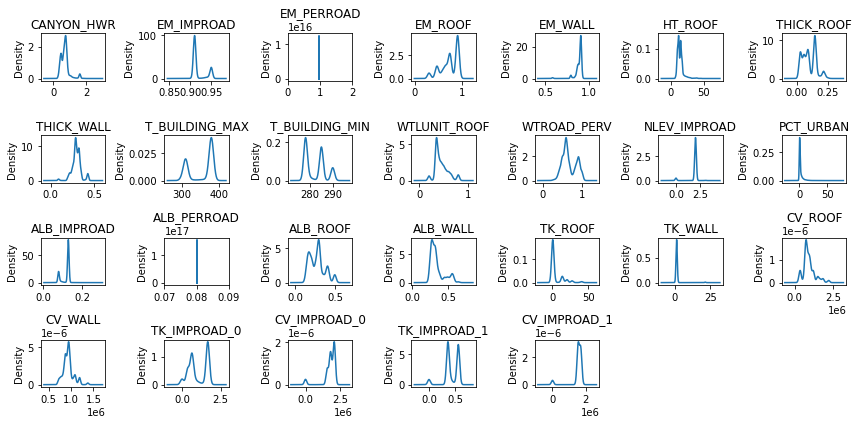

In [ ]:
urban_surf_path = "/home/zhonghua/UrbFLAM/urban_params/urban_surface.nc"
member="003"
TREFMXAV_U = xr.open_dataset("/home/zhonghua/UrbFLAM/b.e11.BRCP85C5CNBDRD.f09_g16.003.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
# get the clm latitude
CLM_lat = TREFMXAV_U.indexes['lat']
# get the mask of clm
mask = TREFMXAV_U["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze().drop("time")
ds_param = xr.open_dataset(urban_surf_path)\
             .rename_dims({"lsmlat":"lat", "lsmlon":"lon"})\
             .assign_coords(lat = mask.lat, lon = mask.lon).where(mask)
df_param = ds_param.to_dataframe().dropna()

display(df_param.describe().transpose())

idx = 1
fig = plt.figure(figsize=(12,6))
for f in fd["surf"]:
    ax = fig.add_subplot(4,7,idx)
    df_param[f].plot.kde(ax=ax)
    ax.set_title(f)
    idx+=1 
    if idx == 4:
        ax.set_xlim(0,2)
    if idx == 17:
        ax.set_xlim(7e-2,9e-2)
plt.tight_layout()
plt.savefig("surf_distribution_original_4439.pdf", dpi=188)
plt.show()

**urban surface - sampling**

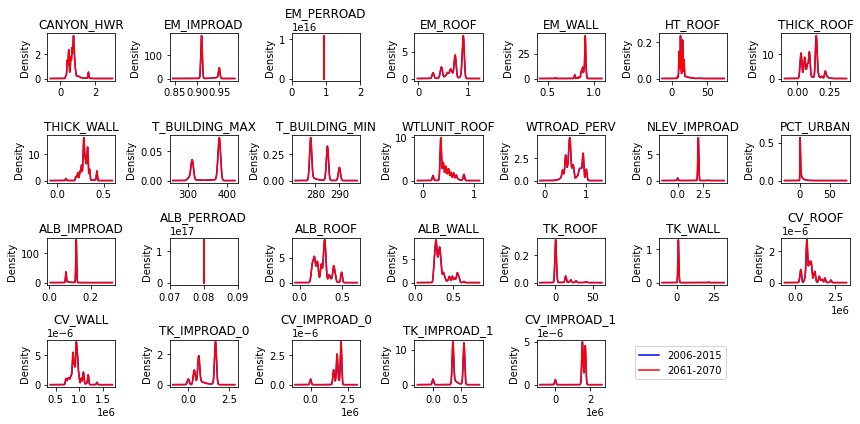

CPU times: user 1min 30s, sys: 2min 13s, total: 3min 44s
Wall time: 1min


In [40]:
%%time
idx = 1
fig = plt.figure(figsize=(12,6))
for f in fd["surf"]:
    ax = fig.add_subplot(4,7,idx)
    if idx == 1:
        df_2006[f].plot.kde(ax=ax, label="2006-2015", color="blue")
        df_2061[f].plot.kde(ax=ax, label="2061-2070", color="red")
    else:
        df_2006[f].plot.kde(ax=ax, color="blue", label='', legend=False)
        df_2061[f].plot.kde(ax=ax, color="red", label='', legend=False)
    ax.set_title(f)
    idx+=1 
    if idx == 4:
        ax.set_xlim(0,2)
    if idx == 17:
        ax.set_xlim(7e-2,9e-2)
        
fig.legend(loc='lower right', bbox_to_anchor=(0.85, 0.1))
plt.tight_layout()
plt.savefig("surf_distribution_training.pdf", dpi=188)
plt.show()